## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK xx : Topic </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Ragil Muhamad Ramadhan"
myNIM = "58511"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Ragil Muhamad Ramadhan
NIM: 		58511
Start: 		2023-10-05 15:11:42.153759
Device ID: 	d119e937-6356-11ee-8d81-89ffbba8a0c3



---

### Dataset yang dipakai:

1. [diabetes] – sumber : [https://www.kaggle.com/datasets/aemyjutt/diabetesdataanslysis]
2. [cleaned_all_phones] – sumber : [https://www.kaggle.com/datasets/berkayeserr/phone-prices]

---

### Hasil kerja

#### Importing system library

In [3]:
import sys 

#### Importing numpy library

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

(768,)

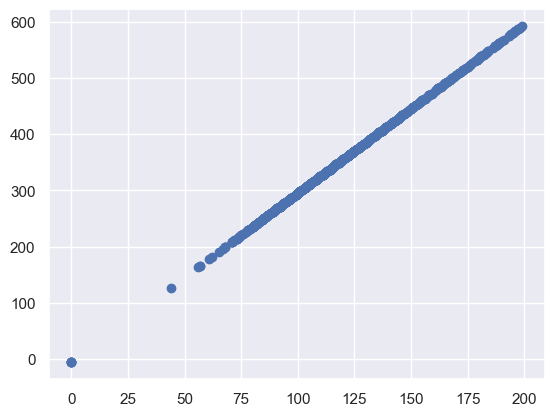

In [7]:
# Simple Linear Regression
db = pd.read_csv('./diabetes.csv')
x = db['Glucose']
y = 2 * x - 5 + db['Glucose'] # y = 2x - 5 + noise
plt.scatter(x, y);
x.shape

In [8]:
db.iloc[:3, 1:2]

,Glucose
0,148
1,85
2,183


C:\Users\ragil\AppData\Local\Temp\ipykernel_8380\717396053.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


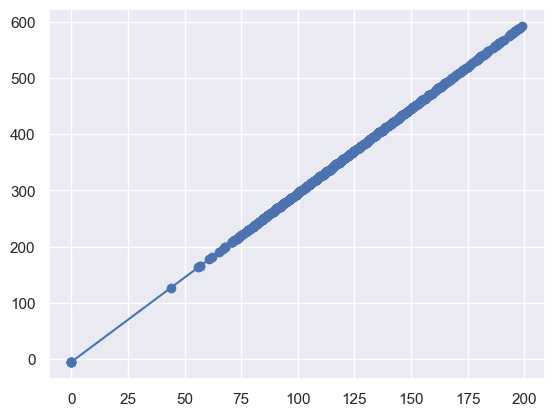

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 199, 768)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [13]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     3.0000000000000013
Model intercept: -5.0000000000001705


In [14]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000091
[ 1.5 -2.   1. ]


In [18]:
# Polynomial Basis Functions
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [19]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

C:\Users\ragil\AppData\Local\Temp\ipykernel_8380\3865398595.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x[:, np.newaxis], y)


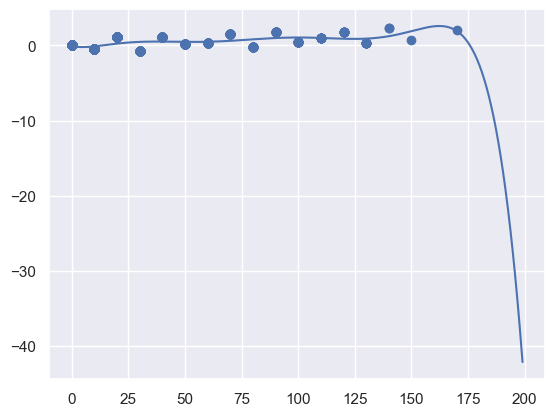

In [20]:
x = 10 * db['Pregnancies']
y = np.sin(x) + 0.1 * db['Pregnancies']

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

C:\Users\ragil\AppData\Local\Temp\ipykernel_8380\3958818118.py:28: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


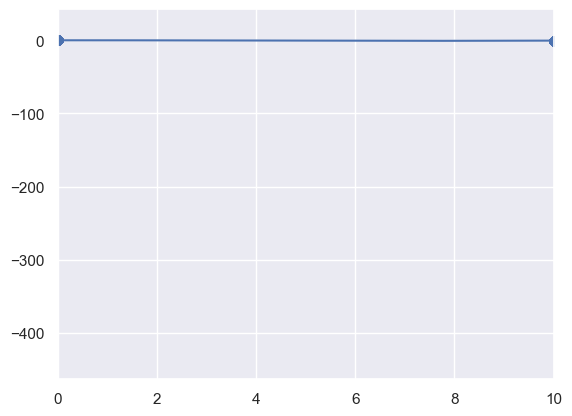

In [21]:
# Gaussian Basis Functions
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
  
  def __init__(self, N, width_factor=2.0):
    self.N = N
    self.width_factor = width_factor
    
  @staticmethod
  def _gauss_basis(x, y, width, axis=None):
    arg = (x - y) / width
    return np.exp(-0.5 * np.sum(arg ** 2, axis))
  
  def fit(self, X, y=None):
    # create N centers spread along the data range
    self.centers_ = np.linspace(X.min(), X.max(), self.N)
    self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
    return self
  
  def transform(self, X):
    return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                             self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

C:\Users\ragil\AppData\Local\Temp\ipykernel_8380\1683603110.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


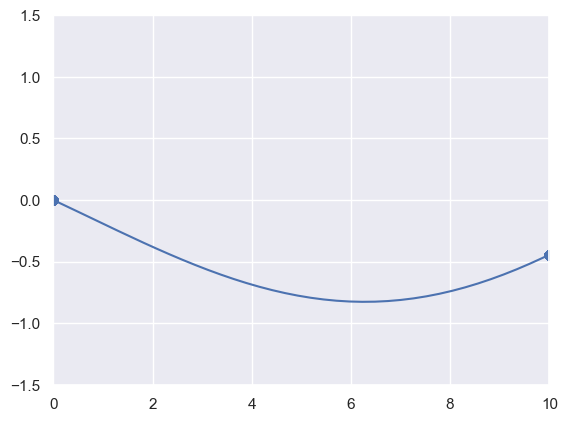

In [22]:
# Regularization
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

C:\Users\ragil\AppData\Local\Temp\ipykernel_4456\1989499234.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


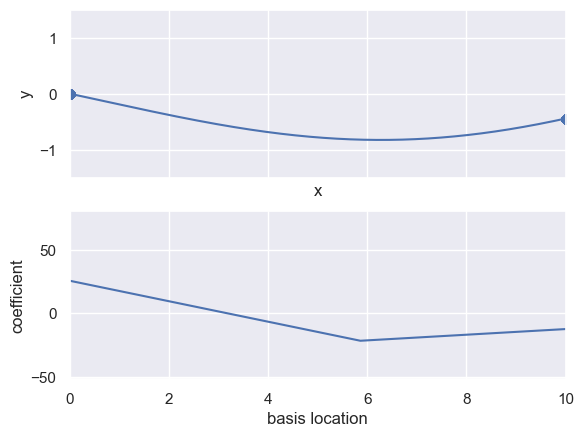

In [289]:
def basis_plot(model, title=None) :
  fig, ax = plt.subplots(2, sharex=True)
  model.fit(x[:, np.newaxis], y)
  ax[0].scatter(x, y)
  ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
  ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
  
  if title :
    ax[0].set_title(title)
    
  ax[1].plot(model.steps[0][1].centers_,
             model.steps[1][1].coef_)
  ax[1].set(xlabel='basis location',
            ylabel='coefficient',
            xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

C:\Users\ragil\AppData\Local\Temp\ipykernel_4456\1989499234.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


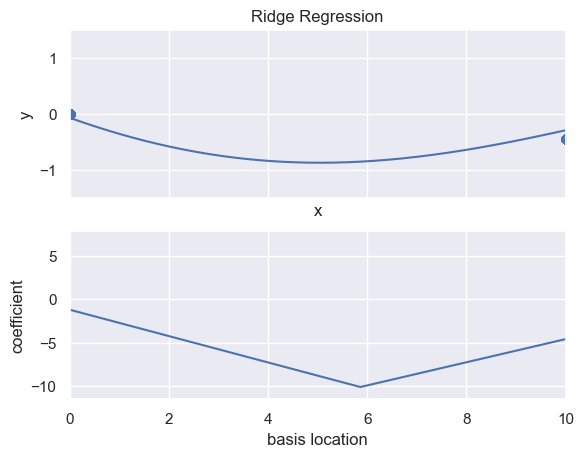

In [290]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

C:\Users\ragil\AppData\Local\Temp\ipykernel_4456\1989499234.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)
C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+01, tolerance: 4.455e-02
  model = cd_fast.enet_coordinate_descent(


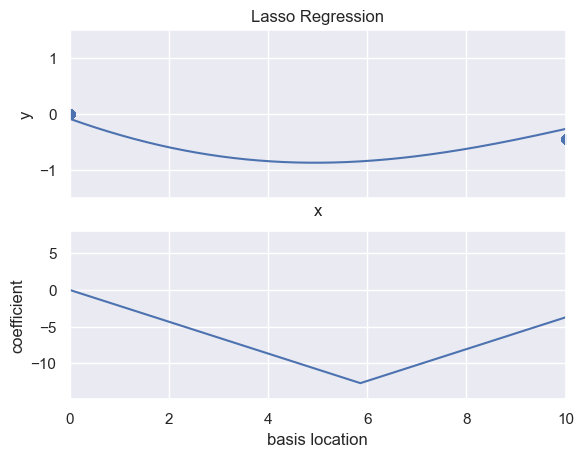

In [291]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

In [163]:
import pandas as pd
counts = pd.read_csv('./FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('./BicycleWeather.csv', index_col='DATE', parse_dates=True)

33500

In [166]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
daily.size

2493

In [107]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7) :
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [108]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

C:\Users\ragil\AppData\Local\Temp\ipykernel_4456\3151681549.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


(8.0, 17.0)

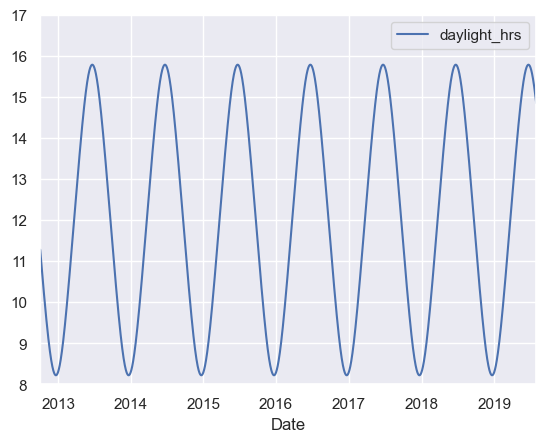

In [109]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
  """Compute the hours of daylight for the given date"""
  days = (date - pd.datetime(2000, 12, 21)).days
  m = (1. - np.tan(np.radians(latitude))
       * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
  return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();
plt.ylim(8, 17)

In [110]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [111]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [112]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [113]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']

X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

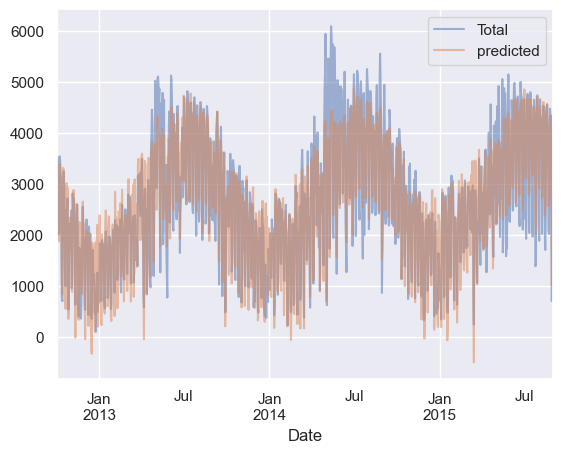

In [114]:
daily[['Total', 'predicted']].plot(alpha=0.5);

In [115]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              504.882756
Tue              610.233936
Wed              592.673642
Thu              482.358115
Fri              177.980345
Sat            -1103.301710
Sun            -1133.567246
holiday        -1187.401381
daylight_hrs     128.851511
PRCP            -664.834882
dry day          547.698592
Temp (C)          65.162791
annual            26.942713
dtype: float64

In [116]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [136]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))


              effect  error
Mon            505.0   86.0
Tue            610.0   83.0
Wed            593.0   83.0
Thu            482.0   85.0
Fri            178.0   81.0
Sat          -1103.0   80.0
Sun          -1134.0   83.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -665.0   62.0
dry day        548.0   33.0
Temp (C)        65.0    4.0
annual          27.0   18.0


In [118]:
# !pip install mglearn

In [119]:
import mglearn
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

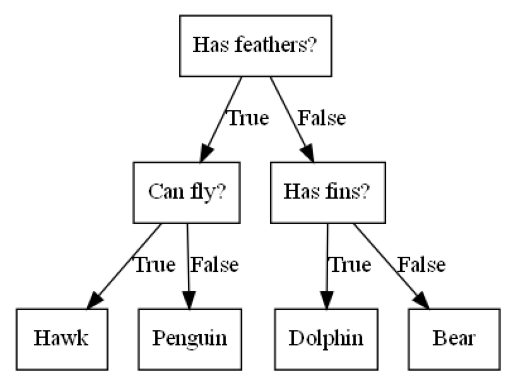

In [120]:
mglearn.plots.plot_animal_tree()

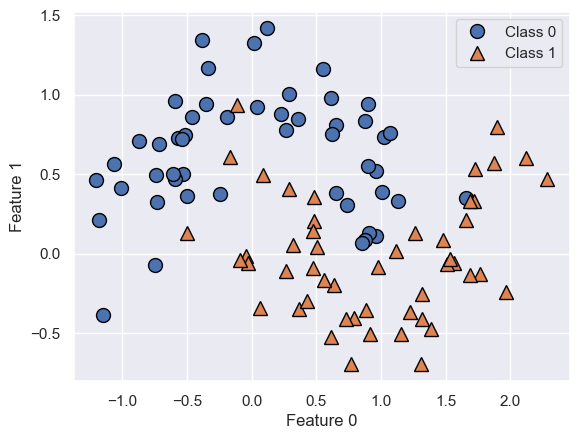

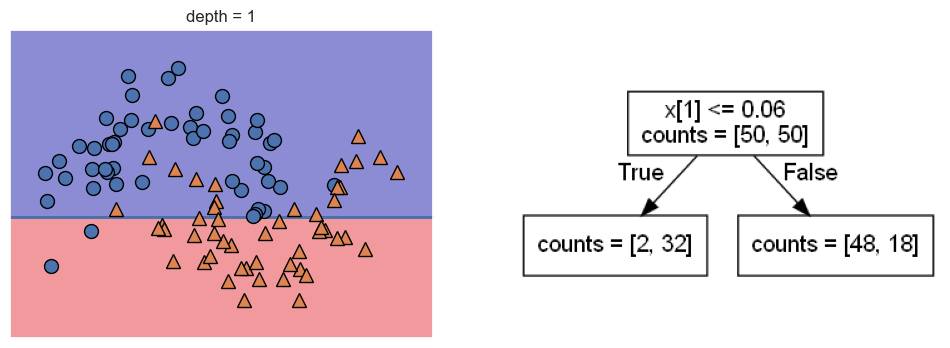

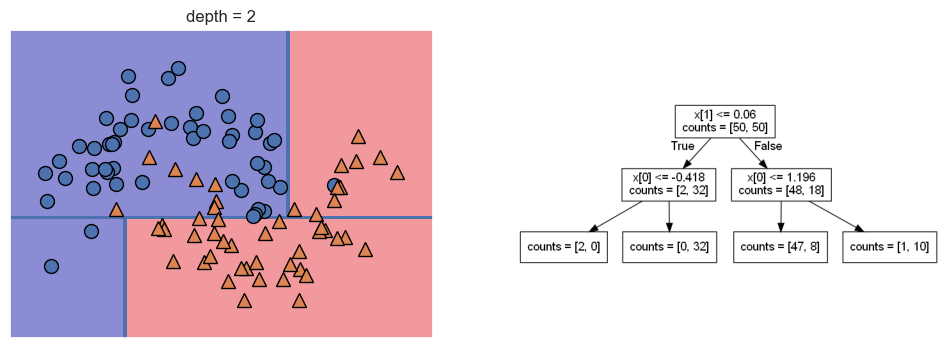

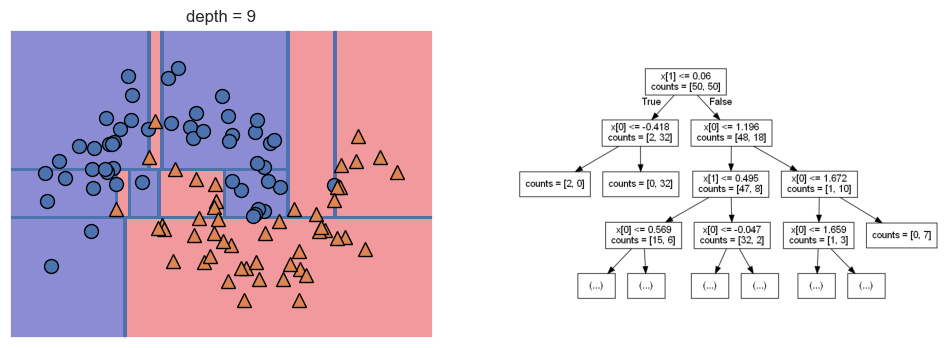

In [121]:
mglearn.plots.plot_tree_progressive()

In [138]:
# Controlling Complexity of Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [123]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


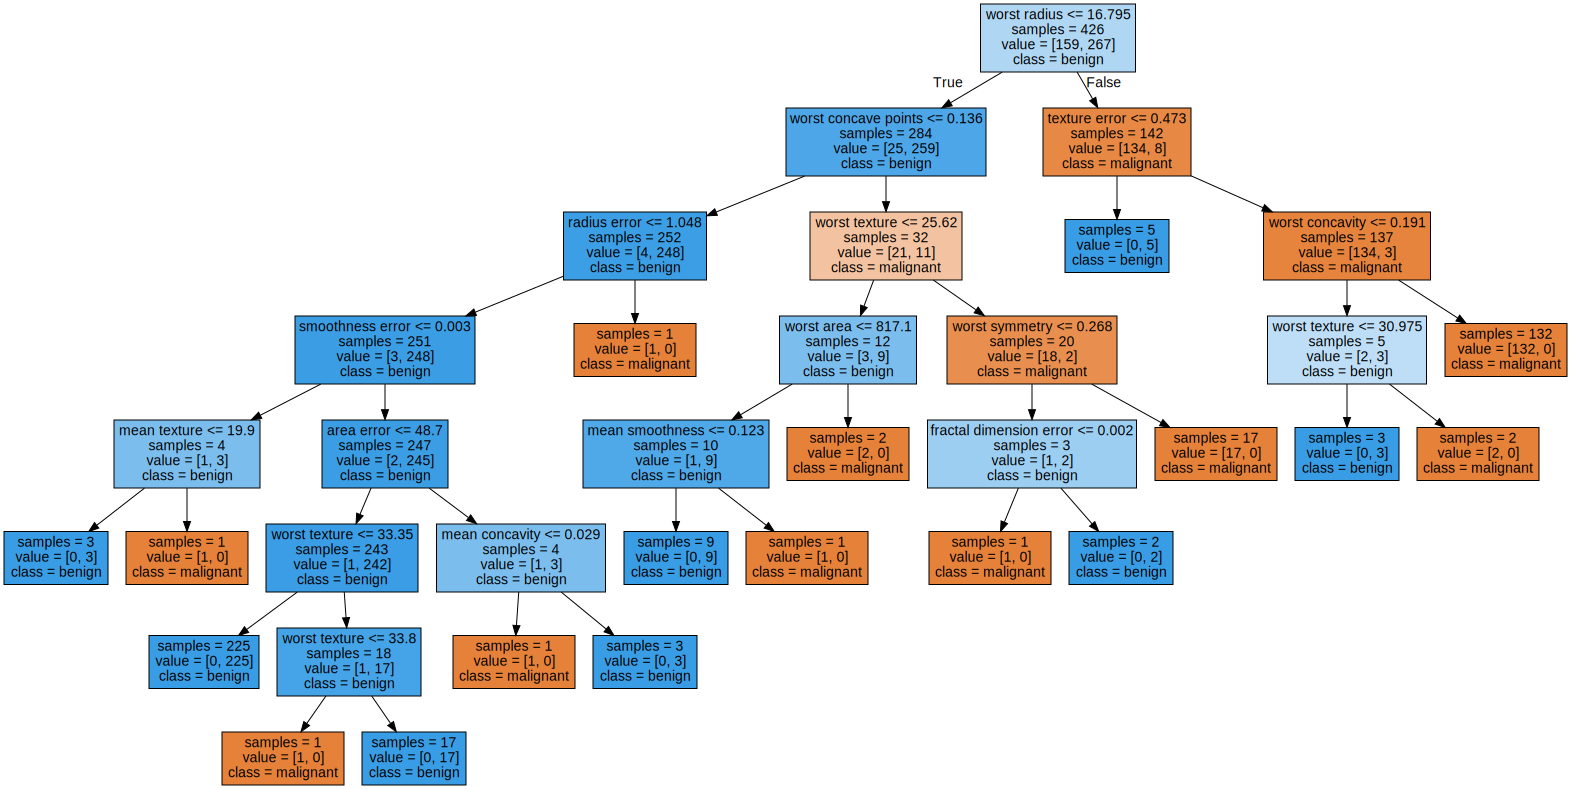

In [141]:
# Analyzing Decision Trees
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [125]:
# Feature Importance in Trees
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


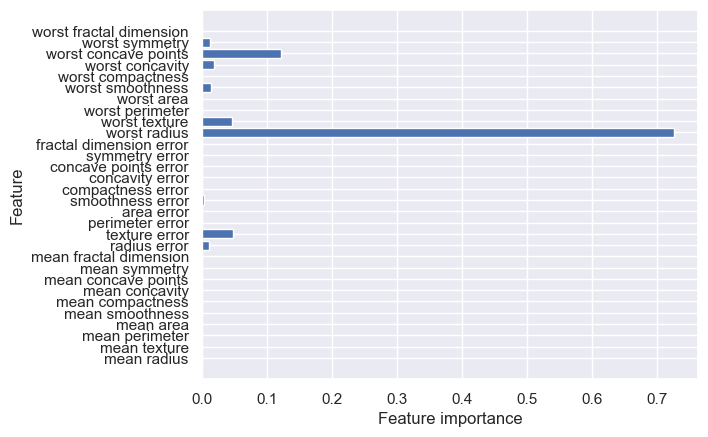

In [126]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


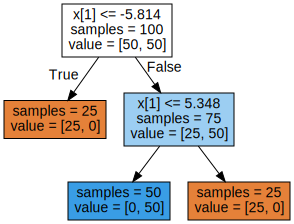

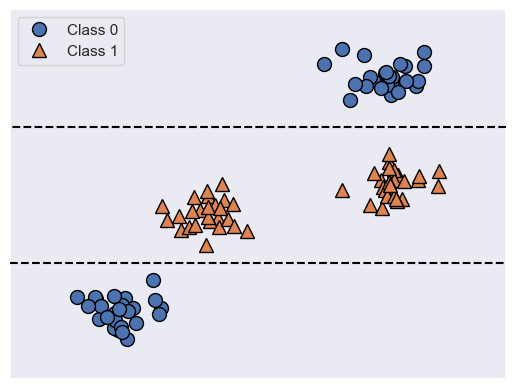

In [128]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [302]:
import os
gd = pd.read_csv("./cleaned_all_phones.csv", index_col='announcement_date', parse_dates=True)

In [332]:
# Random Forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = gd[gd['battery'] < 5000]
data_test = gd[gd['battery'] >= 5000]

# predict prices based on date
x_train = data_train.battery[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train['price(USD)'])

tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

# predict on all data
x_all = gd.battery[:, np.newaxis]

pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


C:\Users\ragil\AppData\Local\Temp\ipykernel_4456\687595855.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = data_train.battery[:, np.newaxis]
C:\Users\ragil\AppData\Local\Temp\ipykernel_4456\687595855.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_all = gd.battery[:, np.newaxis]


array([193.61737397, 218.77417328, 235.41118144, ..., 406.91042707,
       348.01071011, 348.01071011])

In [340]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.25, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

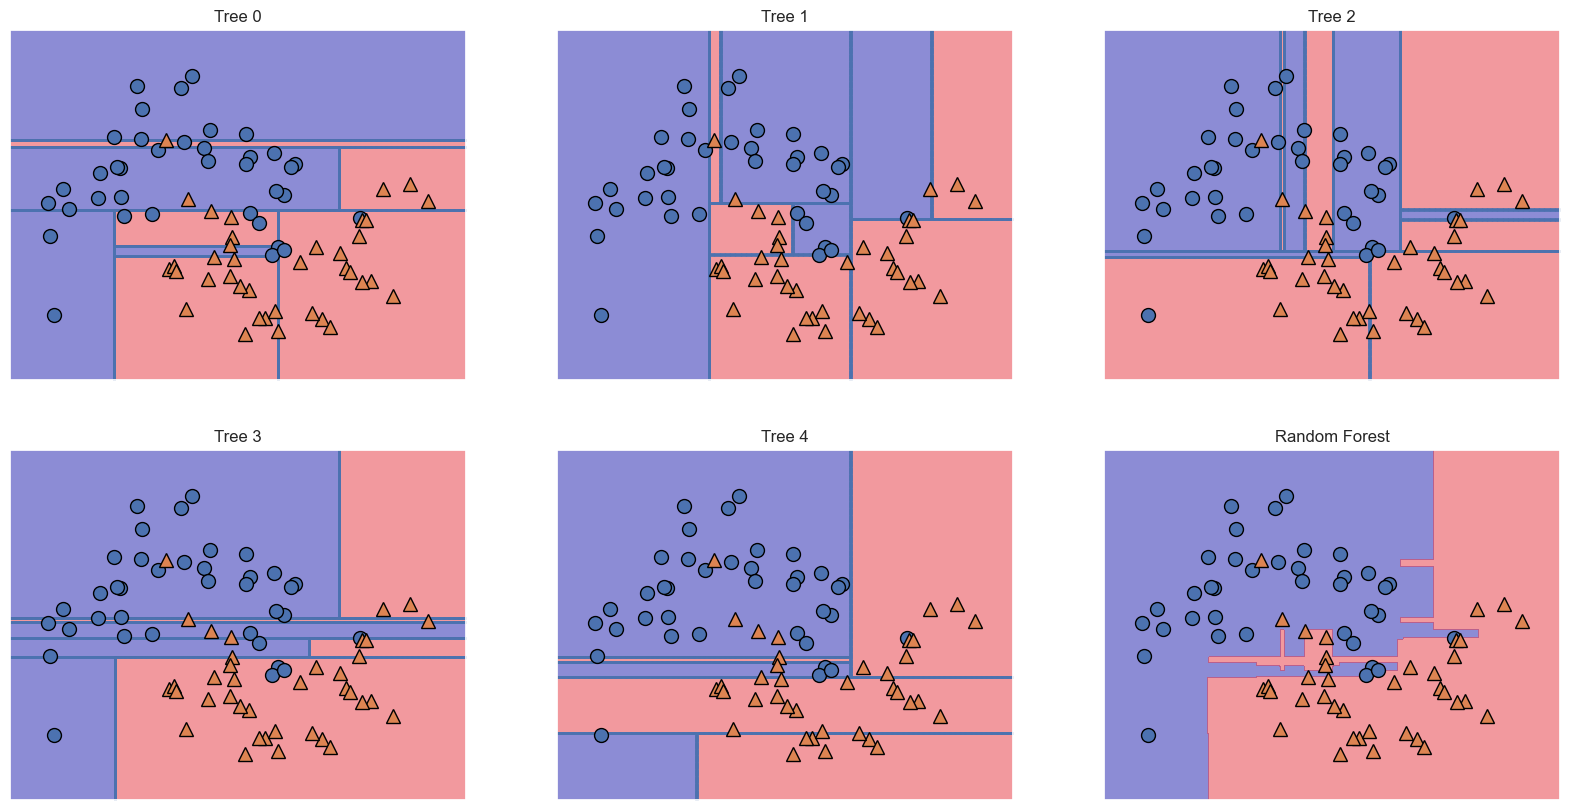

In [329]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)) :
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(x_train, y_train, tree, ax=ax)
  
mglearn.plots.plot_2d_separator(forest, x_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)

In [325]:
x_train, x_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - pada dataset1 dilakukan uji coba regresi linear untuk melakukan prediksi dari nilai y.
    - Berdasarkan dataset yang saya gunakan tertampil akurasi dari train data berupa 1 dan data test 0.972
    - dari berbagai test yang dilakukan terdapat perbedaan pada data test dimana Decision Trees : 0.937 ~ 0.951, dan random forest = 0.972
    - Karena dataset memiliki nilai dengan selisih yang tidak jauh maka grafik terlihat lebih stabil.

---

In [341]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Ragil Muhamad Ramadhan
NIM: 		58511
Time-stamp:	2023-10-01 22:44:55.729261


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [346]:
!jupyter nbconvert --to html "./IF540_EL_Laporan_05_58511_RagilMuhamadRamadhan.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_EL_Laporan_05_58511_RagilMuhamadRamadhan.ipynb to html
Traceback (most recent call last):
  File "C:\Users\ragil\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\ragil\anaconda3\Lib\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ragil\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\ragil\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "C:\Users\ragil\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\ragil\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 560, in c